In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from scipy.stats import normaltest

import numpy as np

In [680]:
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [681]:
data = pd.read_csv('winequality-red.csv')


 #  Summary of the dataset.

This dataset is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

# Exploratory Data Analysis

## 1. Understanding the dataset.

In [682]:
data.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [683]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
625,6.8,0.69,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,5
339,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
520,9.8,0.25,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.0,6
988,7.7,0.39,0.12,1.7,0.097,19.0,27.0,0.99596,3.16,0.49,9.4,5
578,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5


In [684]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [685]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [686]:
data.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [687]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [688]:
data.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

## 2. Data cleaning.

No missing values as indicated in the Non-Null Count columns above.

In [689]:
data.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [690]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [691]:
dataset = data.copy()

In [692]:
data.drop_duplicates(inplace=True)

In [693]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 2. Descriptive statistics

In [694]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3. visualization

<AxesSubplot:>

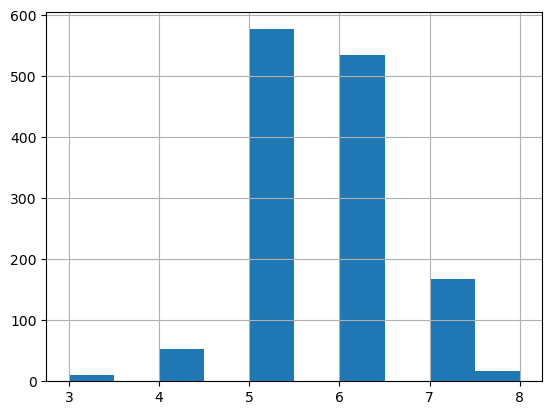

In [695]:
data['quality'].hist()

In [696]:
p_val = 0.005
p_value = normaltest(data['quality'])[1]
p_val > p_value

True

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

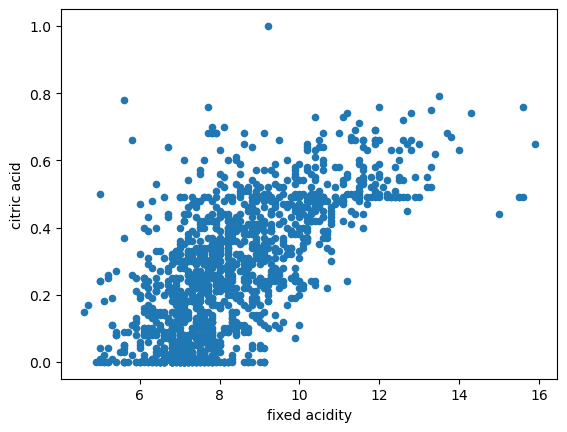

In [697]:
data.plot.scatter(x='fixed acidity', y='citric acid')

<AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>

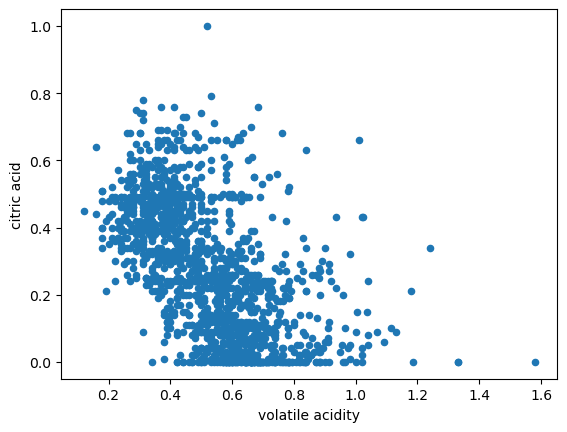

In [698]:
data.plot.scatter(x='volatile acidity', y='citric acid')

In [699]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

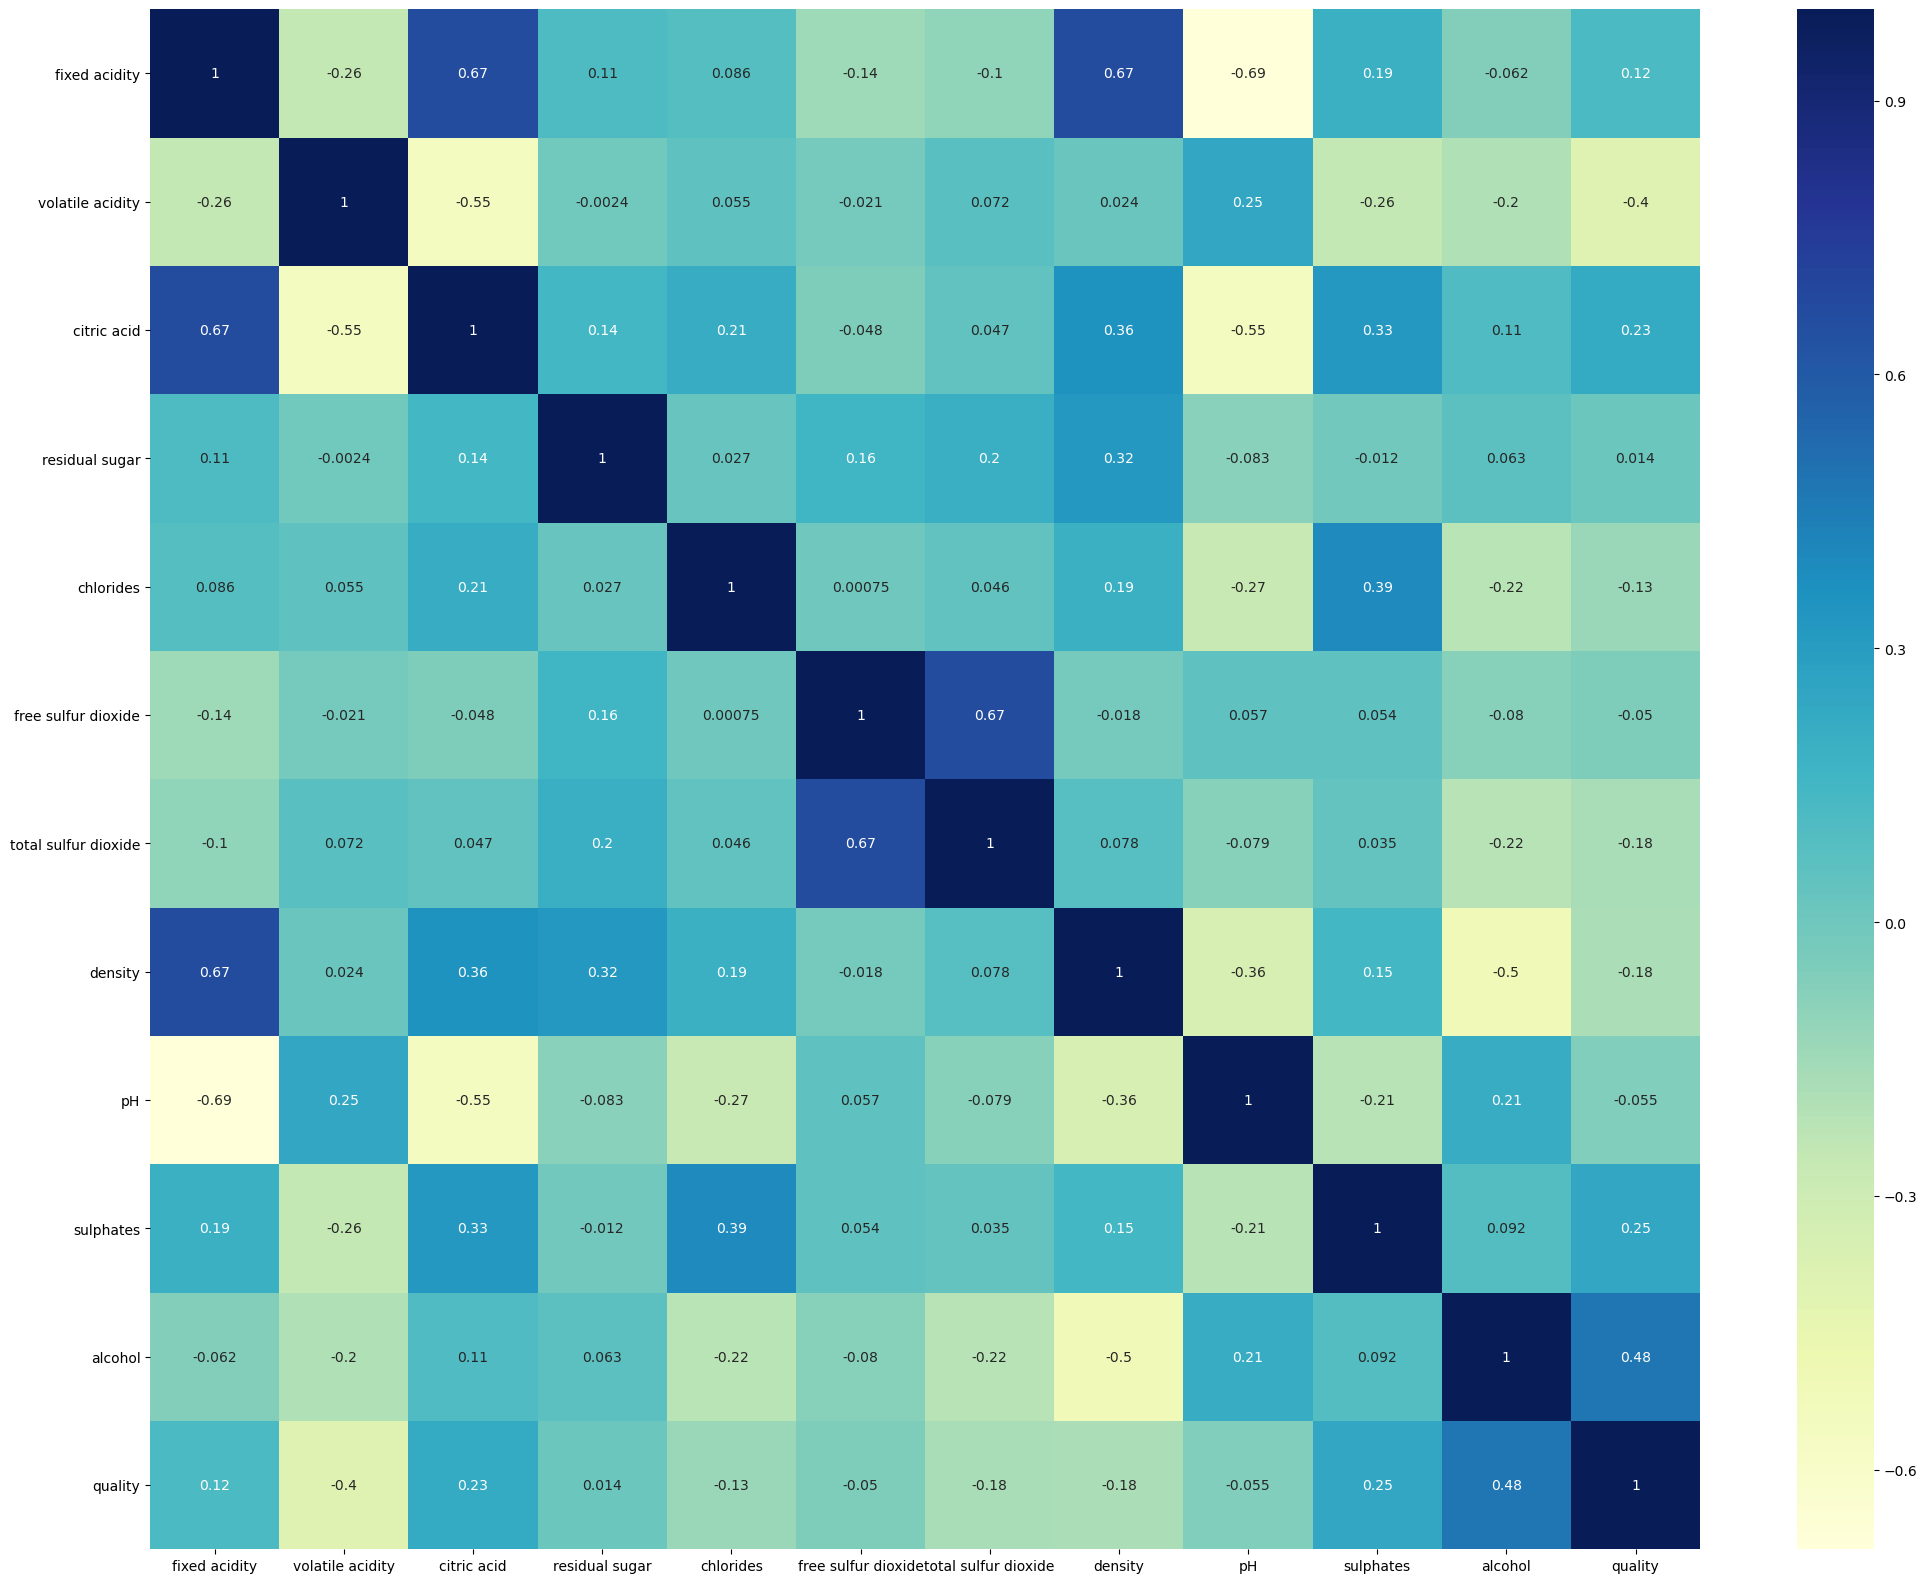

In [700]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")

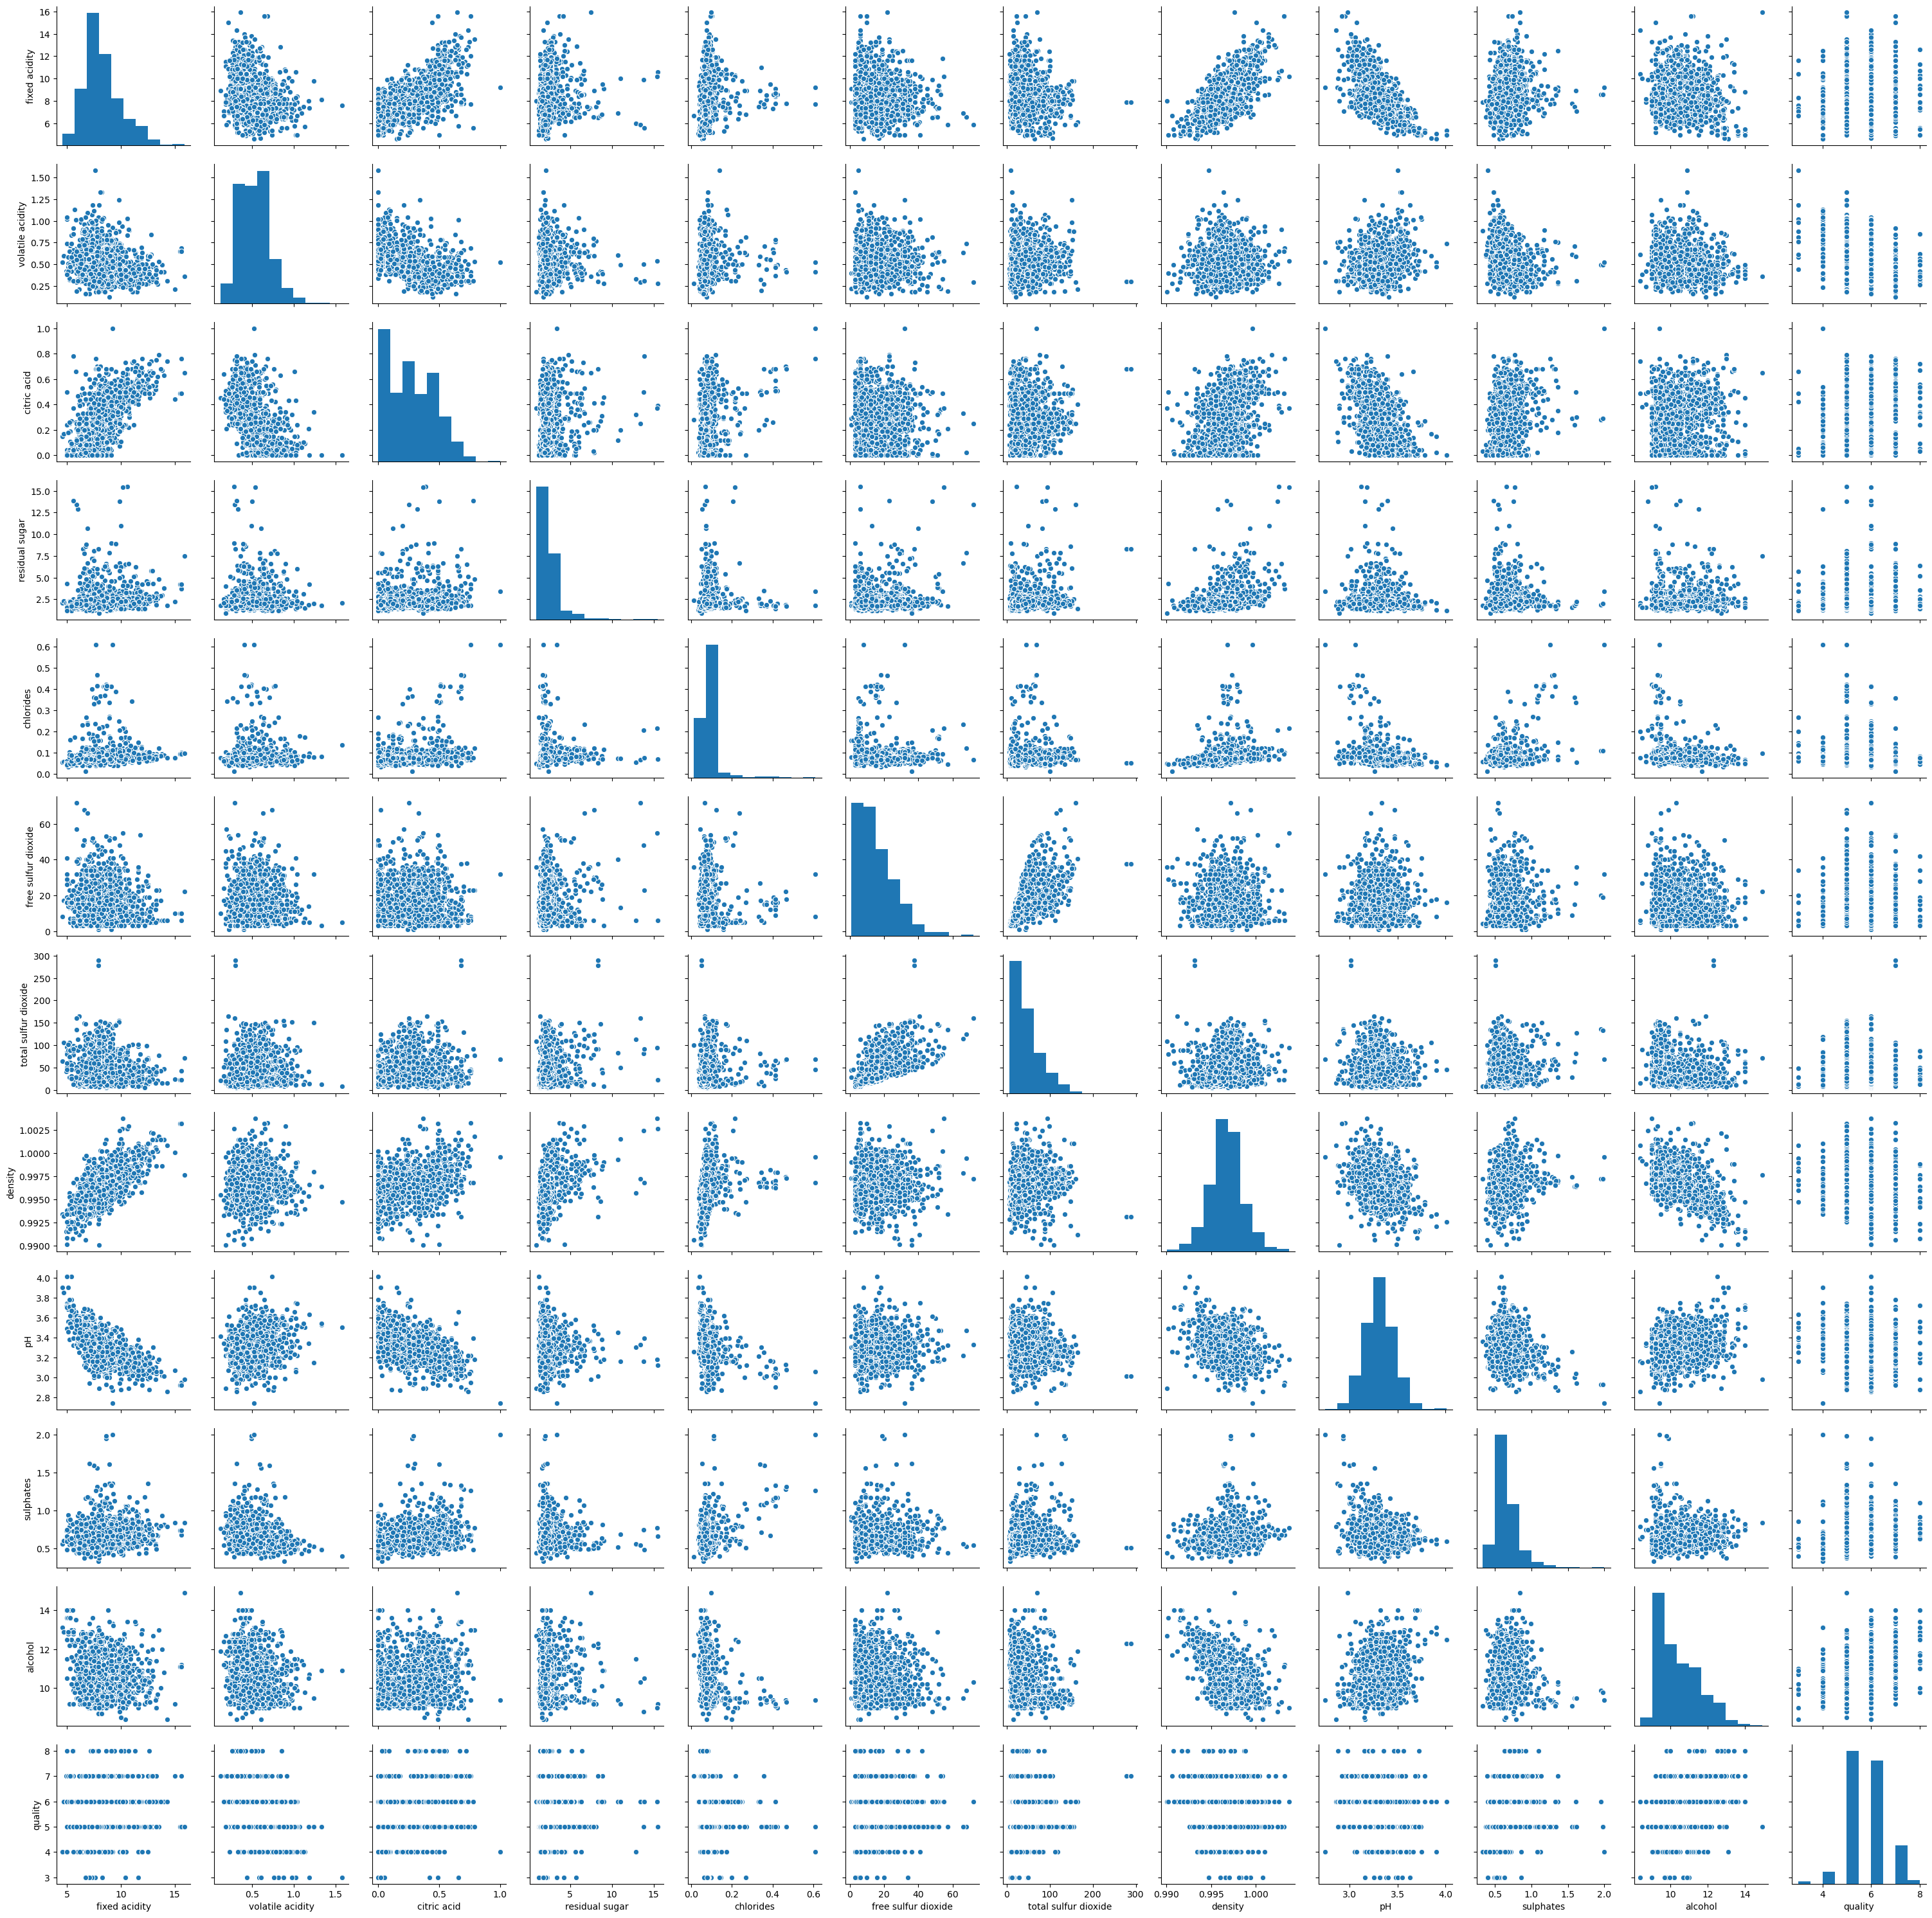

In [662]:
sns.pairplot(data)

## 4. Feature engineering

In [701]:
X = data.drop('quality', axis=1)
y = data['quality']

In [702]:
len(X.columns)

11

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
55,7.7,0.620,0.04,3.8,0.084,25.0,45.0,0.99780,3.34,0.53,9.5
1291,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
593,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2
...,...,...,...,...,...,...,...,...,...,...,...
1305,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1
456,8.9,0.590,0.39,2.3,0.095,5.0,22.0,0.99860,3.37,0.58,10.3
1076,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4


In [704]:
scale = StandardScaler()

In [705]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [706]:
X_test

array([[-0.35421567,  0.51724945, -1.191325  , ...,  0.20919976,
        -0.74531737, -0.84751613],
       [-0.06291586,  0.60206053, -0.88415372, ..., -0.12550578,
         0.54928869,  0.44472273],
       [ 0.05360407, -0.89626845,  0.80528833, ..., -0.92879908,
         0.90236307,  0.72163106],
       ...,
       [ 0.34490388,  0.3476273 ,  0.60050747, ...,  0.41002309,
        -0.45108872, -0.10909392],
       [ 0.9275035 , -1.17897203,  1.4708261 , ..., -1.0626813 ,
         0.43159723,  0.90623661],
       [ 1.04402343, -1.23551274,  0.39572662, ..., -0.46021132,
         1.02005453,  0.72163106]])

In [707]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

## 1.Model1

In [708]:
model = Lasso(alpha=0.01, max_iter=100000)

In [709]:
model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [710]:
prediction = model.predict(X_test)

In [711]:
r2_score(y_test, prediction)

0.39080863246213404

In [712]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [713]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',]

In [714]:
coef = model.coef_.tolist()

In [715]:
coef = []
for val in model.coef_:
    if val !=0:
        coef.append(val)

Text(0.5, 1.0, 'Most relevant features')

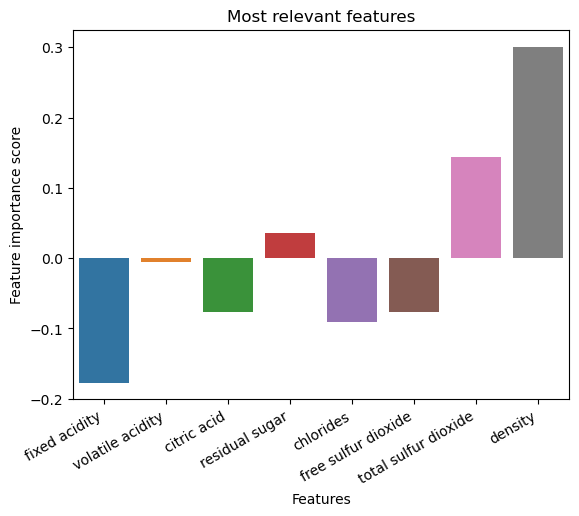

In [716]:
plt.plot(figsize=(10,8))
sns.barplot(x=col_names, y=coef)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature importance score')
plt.title("Most relevant features")

## Model2

In [717]:
alphas = np.geomspace(1e-1, 1e-8, num=8)
scaler = StandardScaler()

In [718]:
scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    estimator = Pipeline([("scaler", scaler),("model", lasso)])
    predictions = cross_val_predict(estimator,X,y,cv=kf)
    score = r2_score(y, predictions)
    scores.append(score)

In [719]:
list(zip(alphas, scores))

[(0.1, 0.30541652337713154),
 (0.01, 0.3392167490334952),
 (0.001, 0.3332548065905888),
 (0.0001, 0.33243612418036883),
 (1e-05, 0.332350846967411),
 (1e-06, 0.3323422789976008),
 (1e-07, 0.33234142213442963),
 (1e-08, 0.33234133642635155)]

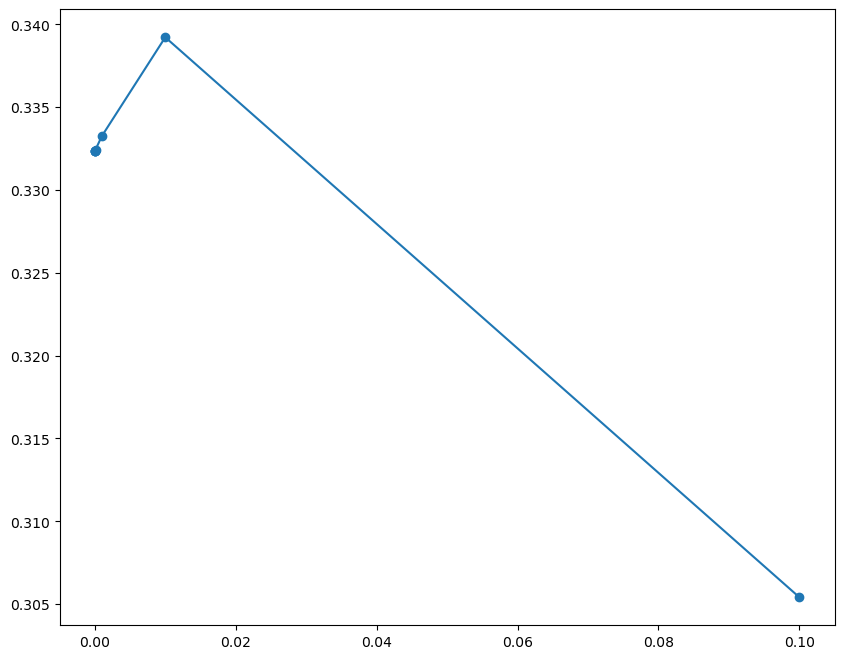

In [720]:
plt.figure(figsize=(10, 8))
plt.plot(alphas, scores, '-o')

From the graph above, r2 score is maximum when alpha is 0.01.

In [721]:
lasso = Lasso(alpha=0.01, max_iter=100000)
lasso.fit(X, y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [722]:
coeff = []
for i in lasso.coef_:
    if i !=0:
        coeff.append(i)

In [723]:
X.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [724]:
column_names = ['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

Text(0.5, 1.0, 'Most relevant features')

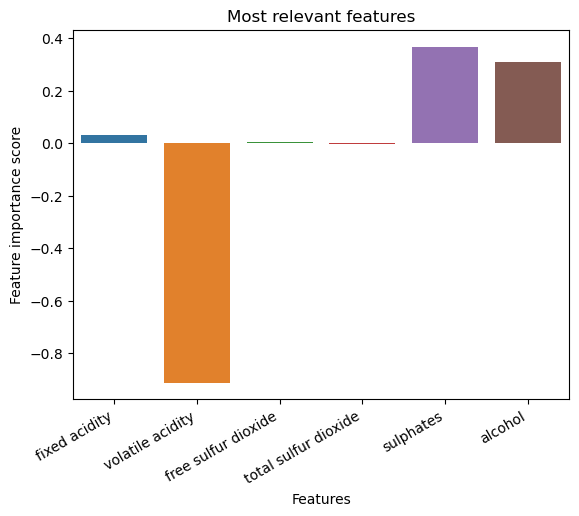

In [727]:
plt.plot(figsize=(10,8))
sns.barplot(x=column_names, y=coeff)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature importance score')
plt.title("Most relevant features")

## Model3

In [728]:
estimator = Pipeline([("scaler",scaler), ("polynomial_features", PolynomialFeatures()),
                     ("lasso_regression", Lasso())])
params = {"polynomial_features__degree":[1,2,3],
"lasso_regression__alpha":np.geomspace(1e-1, 1e-5, 20)
}

In [729]:
grid = GridSearchCV(estimator, params)

In [730]:
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso_regression', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomial_features__degree': [1, 2, 3], 'lasso_regression__alpha': array([1.00000e-01, 6.15848e-02, 3.79269e-02, 2.33572e-02, 1.43845e-02,
       8.85867e-03, 5.45559e-03, 3.35982e-03, 2.06914e-03, 1.27427e-03,
       7.84760e-04, 4.83293e-04, 2.97635e-04, 1.83298e-04, 1.12884e-04,
       6.95193e-05, 4.28133e-05, 2.63665e-05, 1.62378e-05, 1.00000e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       sc

In [731]:
grid.best_score_

0.33647006644810973

In [732]:
grid.best_params_

{'lasso_regression__alpha': 0.008858667904100831,
 'polynomial_features__degree': 1}

In [733]:
y_predict = grid.predict(X_test)

In [734]:
r2_score(y_test, y_predict)

0.3903942340755384

In [735]:
coefficient = grid.best_estimator_.named_steps["lasso_regression"].coef_

In [736]:
coefficients = []
col_names = []
def get_coef(coef):
    items = zip(X.columns, coef)
    for key, val in items:
        if val !=0:
            coefficients.append(val)
            col_names.append(key)

In [737]:
get_coef(coefficient)

Text(0.5, 1.0, 'Most relevant features')

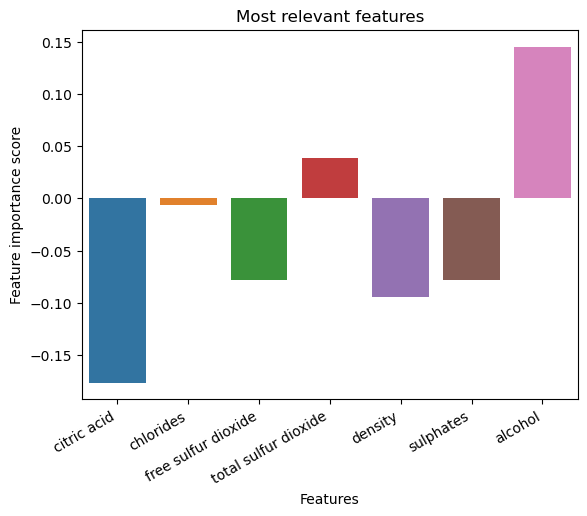

In [740]:
plt.plot(figsize=(10,8))
sns.barplot(x=col_names, y=coefficients)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature importance score')
plt.title("Most relevant features")

In [ ]:
select_features = ["citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "sulphate","alcohol"]